# Readme 

Ce notebook est pour faire une modeèle de machine learning pour prédire si une rdv sera absent ou non.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df2 = pd.read_csv('../donnees_nettroye/2023_gold.csv')

In [10]:
df3.head()

,Id,Doctolib Patient ID,Date de début,Début,Durée du RDV,Agenda,Motif du RDV,Notes,Date de saisie,Date de dernière mise à jour,...,maladie spécifique) ?,Précisez le type d'injection,Identifiant Externe,Temps de réservation en secondes,A été importé,A été réservé lors d'une absence,A été réservé sur un créneau horaire déjà réservé,A été réservé en dehors des horaires d'ouverture,Dispositif de réservation pour les patients,Personne référente
0,4276042583,1733349697,02/01/2023,09h00,15,MEKHATRIA Sid (Rapée),Adulte - Consultation de médecine générale,NaN,2022-12-29,2023-01-24T12:00:24.044+01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4279470930,2518302311,02/01/2023,09h00,20,MEYKIECHEL Tiphaine,Première consultation de gynécologie,APC + JKHD001,2023-01-01,2023-01-02T09:47:45.981+01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4192809235,2435238586,02/01/2023,09h00,15,COSTES Jean,Consultation de suivi d'allergologie,NaN,2022-11-30,2023-01-02T09:46:57.770+01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4279779300,2518370353,02/01/2023,09h15,20,COSTES Jean,Urgence,A,2023-01-01,2023-01-02T09:47:33.129+01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4277334926,2053339522,02/01/2023,09h15,15,MEKHATRIA Sid (Rapée),Adulte - Consultation de médecine générale,NaN,2022-12-30,2023-01-02T09:11:26.923+01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df3[df3['Date de saisie'] == 'JKLD001  p'])


              Id  Doctolib Patient ID Date de début  Début  Durée du RDV  \
1315  4330615150           1660225204    17/01/2023  17h30            20   

                   Agenda                          Motif du RDV Notes  \
1315  MEYKIECHEL Tiphaine  Consultation de suivi de gynécologie     -   

     Date de saisie   Date de dernière mise à jour  ...  \
1315     JKLD001  p  2023-01-17T18:01:06.285+01:00  ...   

      maladie spécifique) ? Précisez le type d'injection Identifiant Externe  \
1315                    NaN                          NaN                 NaN   

     Temps de réservation en secondes A été importé  \
1315                              NaN           NaN   

      A été réservé lors d'une absence  \
1315                               NaN   

      A été réservé sur un créneau horaire déjà réservé  \
1315                                                NaN   

      A été réservé en dehors des horaires d'ouverture  \
1315                                           

In [19]:
df3 = pd.read_csv('../données_brut/export_rdv_2023-01-01-2023-12-31.csv', sep=',')
df3= df3[df3['Motif du RDV'].isin(['Adulte - Consultation de médecine générale','enfant/ado - consultation de médecine générale', 'Consultation de médecine du sport',"Certificat d'aptitude au sport"])]
df3['Date de saisie'] = df3['Date de saisie'].str[:10]
new_df = pd.DataFrame({ 'Id': df3['Id'], 'Date de saisie': df3['Date de saisie'], 'Date de début': df3['Date de début']})

new_df['Date de saisie'] = pd.to_datetime(new_df['Date de saisie'])
new_df['Date de début'] = pd.to_datetime(new_df['Date de début'], format = "%d/%m/%Y")
new_df['Difference (days)'] = (new_df['Date de début'] - new_df['Date de saisie']).dt.days
print(new_df.head())

           Id Date de saisie Date de début  Difference (days)
0  4276042583     2022-12-29    2023-01-02                  4
4  4277334926     2022-12-30    2023-01-02                  3
5  4279375156     2023-01-01    2023-01-02                  1
8  4277315716     2022-12-30    2023-01-02                  3
9  4275045134     2022-12-29    2023-01-02                  4


/tmp/ipykernel_15948/308046935.py:1: DtypeWarning: Columns (45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../données_brut/export_rdv_2023-01-01-2023-12-31.csv', sep=',')


In [20]:
df = pd.merge(df2, new_df[['Id','Difference (days)']], on='Id')

### Sub échantillonage

In [21]:
absence_non_excuse = df[df['Statut'] == 'Absent non excusé']
nb_absence_non_excuse = len(absence_non_excuse)
present = df[df['Statut'] == 'Présent']
present_sample = present.sample(n=nb_absence_non_excuse, random_state=42)
absence_exc = df[df['Statut'] == 'Absent excusé']
resultat = pd.concat([absence_non_excuse, present_sample, absence_exc])
print(resultat['Statut'].value_counts())

Statut
Absent non excusé    740
Présent              740
Absent excusé        465
Name: count, dtype: int64


In [22]:
resultat.head()

,Id,Date de début,Début,Durée du RDV,Motif du RDV,RDV Internet,Nouveau patient,Statut,Civilité,Adresse complète,Age,Difference (days)
40,4277957915,workday,soir,15,Adulte - Consultation de médecine générale,Oui,Oui,Absent non excusé,M.,"27 avenue Billotte, 94000 CRETEIL",48.0,2
48,4278014071,workday,soir,15,enfant/ado - consultation de médecine générale,Oui,Non,Absent non excusé,M.,"2 rue Mirbel , 75005 PARIS",12.0,2
51,4283234141,workday,soir,15,Adulte - Consultation de médecine générale,Oui,Oui,Absent non excusé,M.,"4 rue du clos, 75020 PARIS",23.0,0
54,4283260552,workday,soir,15,Adulte - Consultation de médecine générale,Oui,Oui,Absent non excusé,Mme,"295 rue Lecourbe, 75015 Paris",45.0,0
56,4277910256,workday,soir,15,Adulte - Consultation de médecine générale,Oui,Non,Absent non excusé,M.,"195b rue de Paris , 94220 CHARENTON LE PONT",33.0,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = resultat.drop(['Statut'], axis=1).drop(['Id'], axis=1).drop(['Adresse complète'], axis=1).drop(['Durée du RDV'], axis=1)
X = pd.get_dummies(X)

y = resultat['Statut']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,Age,Difference (days),Date de début_weekend,Date de début_workday,Début_apres-midi,Début_matin,Début_soir,Motif du RDV_Adulte - Consultation de médecine générale,Motif du RDV_Certificat d'aptitude au sport,Motif du RDV_Consultation de médecine du sport,Motif du RDV_enfant/ado - consultation de médecine générale,RDV Internet_Non,RDV Internet_Oui,Nouveau patient_Non,Nouveau patient_Oui,Civilité_M.,Civilité_Mme
5500,26.0,0,False,True,False,False,True,True,False,False,False,False,True,False,True,True,False
5288,23.0,0,False,True,False,False,True,True,False,False,False,False,True,True,False,True,False
6505,25.0,0,False,True,False,False,True,True,False,False,False,False,True,False,True,True,False
3575,32.0,1,False,True,False,False,True,True,False,False,False,False,True,False,True,False,True
5432,38.0,1,False,True,False,False,True,True,False,False,False,False,True,False,True,False,True


### Random Forest

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Modèle avec pondération des classes
model = RandomForestClassifier(class_weight={'Absent excusé': 1, 'Absent non excusé': 5, 'Présent': 1})

# Utilisation de GridSearchCV pour optimiser les hyperparamètres
param_grid = {
    'n_estimators': [10,30,50,100,200],
    'max_depth': [5,10],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X, y)
print(grid_search.best_params_)

# Prédire et évaluer
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

{'max_depth': 10, 'n_estimators': 10}
                   precision    recall  f1-score   support

    Absent excusé       0.94      0.23      0.37       465
Absent non excusé       0.44      0.99      0.61       740
          Présent       0.95      0.22      0.35       740

         accuracy                           0.52      1945
        macro avg       0.78      0.48      0.44      1945
     weighted avg       0.75      0.52      0.46      1945



<AxesSubplot: xlabel='Predicted', ylabel='True'>

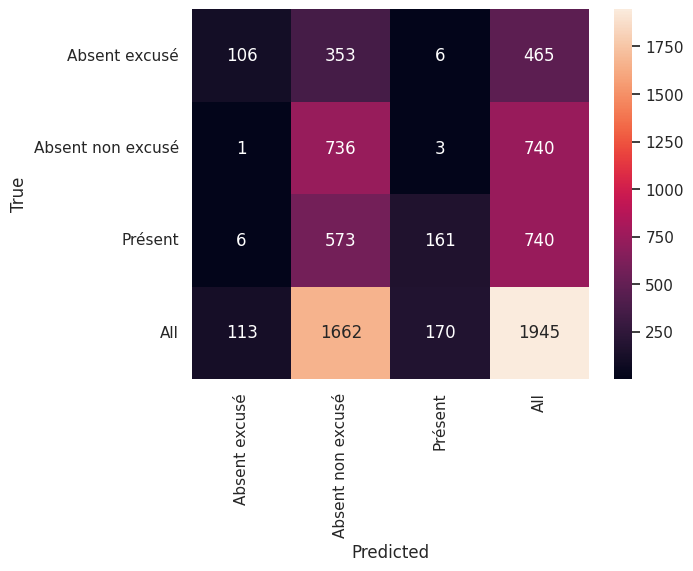

In [105]:
sns.heatmap(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True), annot=True, fmt='d')


[ 0  1 16 15  4]


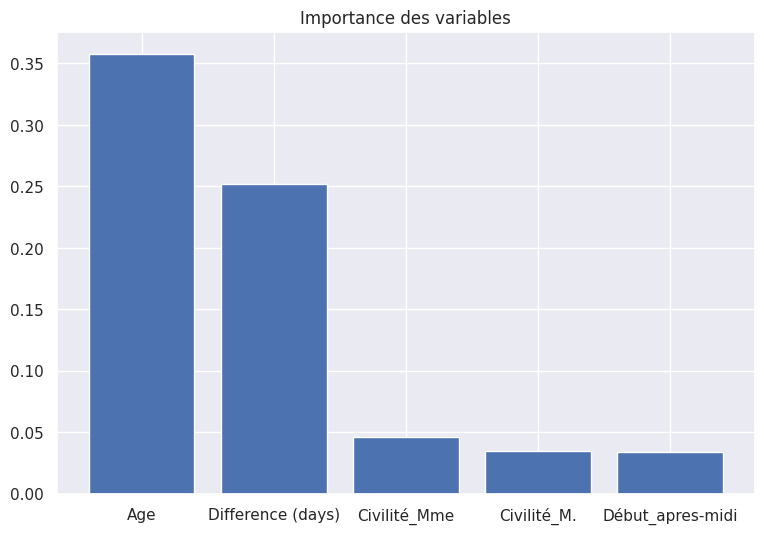

In [106]:
import seaborn as sns

sns.set_theme("notebook")
idx = best_model.feature_importances_.argsort()[::-1][:5]
print(idx)
plt.figure(figsize=(9, 6))
plt.bar(X.columns[idx], best_model.feature_importances_[idx])
plt.title('Importance des variables')
plt.show()

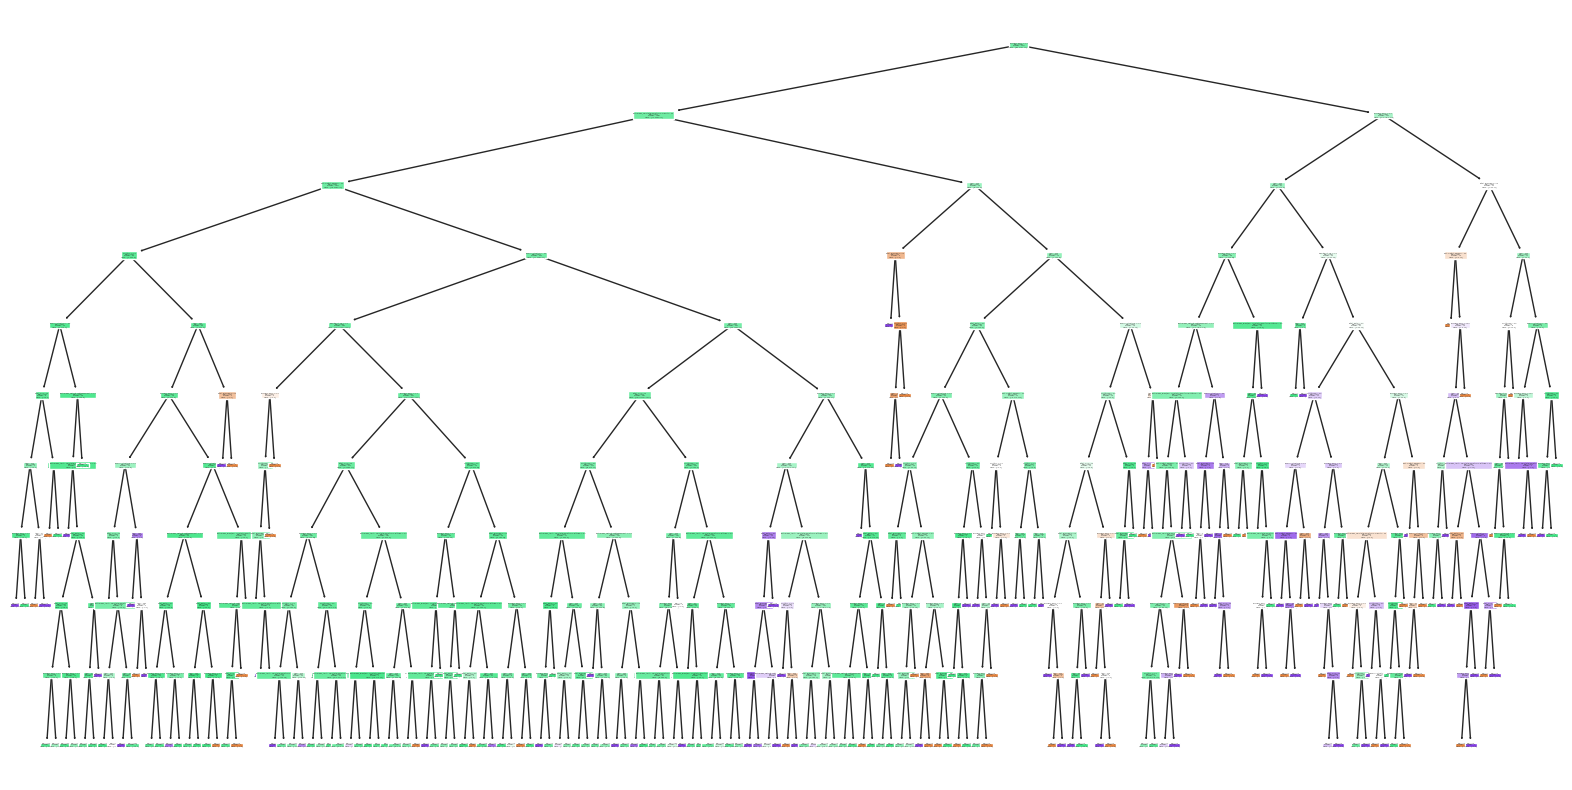

In [109]:
# visualisation de l'arbre que les 5 premières variables
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=X.columns, filled=True)
plt.show()


[Text(0.5, 0.875, 'Difference (days) <= 3.5\ngini = 0.653\nsamples = 1945\nvalue = [465, 740, 740]\nclass = Absent non excusé'),
 Text(0.25, 0.625, 'Age <= 60.5\ngini = 0.648\nsamples = 1758\nvalue = [390, 693, 675]\nclass = Absent non excusé'),
 Text(0.125, 0.375, 'Difference (days) <= 2.5\ngini = 0.648\nsamples = 1724\nvalue = [385, 685, 654]\nclass = Absent non excusé'),
 Text(0.0625, 0.125, 'gini = 0.646\nsamples = 1626\nvalue = [353, 643, 630]\nclass = Absent non excusé'),
 Text(0.1875, 0.125, 'gini = 0.65\nsamples = 98\nvalue = [32.0, 42.0, 24.0]\nclass = Absent non excusé'),
 Text(0.375, 0.375, 'Age <= 79.5\ngini = 0.542\nsamples = 34\nvalue = [5, 8, 21]\nclass = Présent'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 29\nvalue = [4, 5, 20]\nclass = Présent'),
 Text(0.4375, 0.125, 'gini = 0.56\nsamples = 5\nvalue = [1, 3, 1]\nclass = Absent non excusé'),
 Text(0.75, 0.625, 'Difference (days) <= 11.5\ngini = 0.655\nsamples = 187\nvalue = [75, 47, 65]\nclass = Absent excusé'),
 T

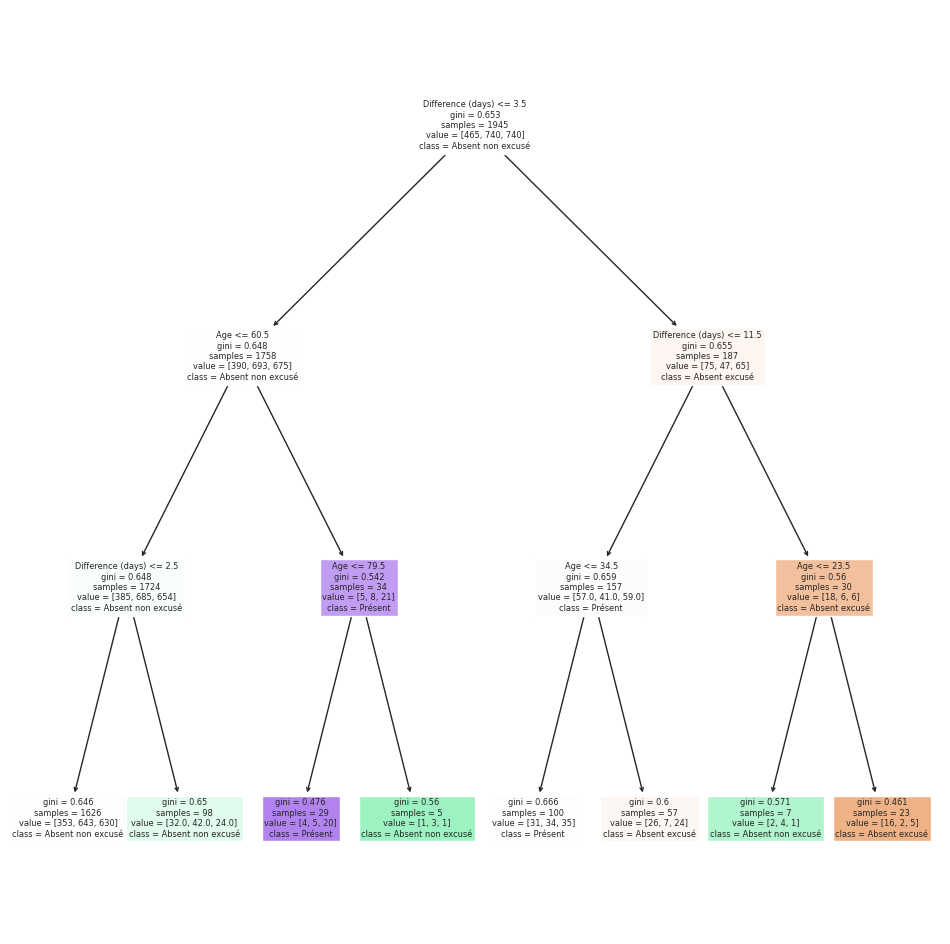

In [117]:
from sklearn import tree
import matplotlib.pyplot as plt

# Obtenez les indices des 5 caractéristiques les plus importantes
idx = best_model.feature_importances_.argsort()[::-1][:3]

# Créez un nouveau modèle d'arbre de décision avec une profondeur maximale de 5
clf = tree.DecisionTreeClassifier(max_depth=3)

# Entraînez le modèle avec seulement les 5 caractéristiques les plus importantes
clf = clf.fit(X.iloc[:, idx], y)

# Visualisez l'arbre
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, 
               feature_names=np.array(feature_names)[idx], 
               class_names=clf.classes_, 
               filled=True, 
               ax=ax)

<AxesSubplot: xlabel='Predicted', ylabel='True'>

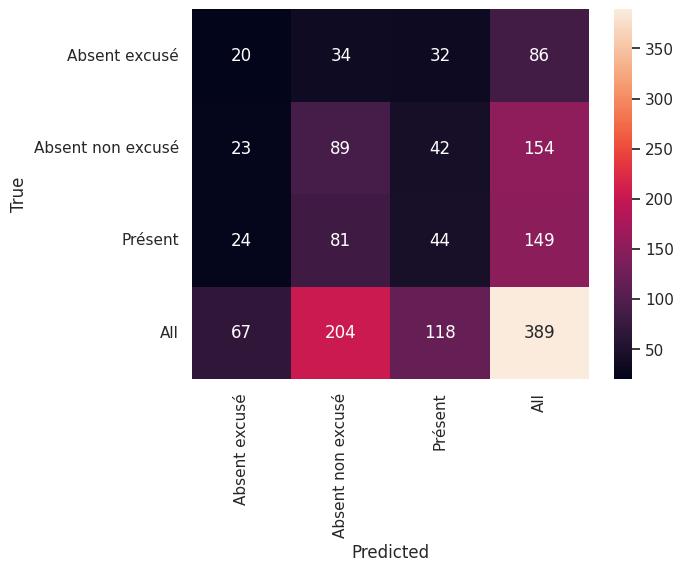

In [94]:
from sklearn.metrics import confusion_matrix
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True), annot=True, fmt='d')

In [29]:
best_model = RandomForestClassifier(class_weight={'Absent excusé': 1, 'Absent non excusé': 1, 'Présent': 1})
best_model.set_params(**grid_search.best_params_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    Absent excusé       0.32      0.08      0.13        86
Absent non excusé       0.45      0.56      0.50       154
          Présent       0.43      0.50      0.46       149

         accuracy                           0.43       389
        macro avg       0.40      0.38      0.36       389
     weighted avg       0.41      0.43      0.40       389



### regression logistique

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={'Absent excusé': 1, 'Absent non excusé': 1, 'Présent': 1})

# Utilisation de GridSearchCV pour optimiser les hyperparamètres
param_grid = {
    'C': [0, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print(grid_search.best_params_)
# Prédire et évaluer
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))





/home/wang/miniforge3/envs/optim/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wang/miniforge3/envs/optim/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'C': 0.1}
                   precision    recall  f1-score   support

    Absent excusé       0.43      0.10      0.16       465
Absent non excusé       0.40      0.47      0.44       740
          Présent       0.44      0.58      0.50       740

         accuracy                           0.42      1945
        macro avg       0.43      0.38      0.37      1945
     weighted avg       0.42      0.42      0.40      1945

